In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12  # change this line if you want to change the default map size
import pandas as pd
import geopandas as gpd
import cenpy as cen

In [2]:
databases = [(k,v) for k,v in cen.explorer.available(verbose=True).items()]
print('total number of databases:', len(databases))
databases[0:5]

total number of databases: 223


[('pubschlfin2012',
  '2012 Public Elementary-Secondary Education Finance: Individual Unit Tables'),
 ('CBP2012', '2012 County Business Patterns: Business Patterns'),
 ('POPESTPROJagegroups2014',
  '2014 National Population Projections: Projected Population by Age Groups, Sex, Race, and Hispanic Origin for the United States'),
 ('POPPROJPop2012',
  '2012 National Population Projections: Projected Population by Single Year of Age'),
 ('POPESTnatmonthly2015',
  'Vintage 2015 Population Estimates: National Monthly Population Estimates')]

In [3]:
api_database = 'ACSSF5Y2015'  # ACS 2011-2015
cen.explorer.explain(api_database)



{'2011-2015 American Community Survey 5-Year Estimates': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population.  Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts (114th congress), all counties, all places, and all tracts and block groups.  Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

### Connect to database

In [4]:
api_conn = cen.base.Connection(api_database)
api_conn

Connection to 2011-2015 American Community Survey 5-Year Estimates (ID: http://api.census.gov/data/id/ACSSF5Y2015)

In [5]:
api_conn.geographies.keys()


dict_keys(['fips'])

In [6]:
api_conn.geographies['fips']


,geoLevelId,name,optionalWithWCFor,requires,wildcard
0,310,metropolitan statistical area/micropolitan sta...,NaN,NaN,NaN
1,010,us,NaN,NaN,NaN
2,020,region,NaN,NaN,NaN
3,030,division,NaN,NaN,NaN
4,400,urban area,NaN,NaN,NaN
5,250,american indian area/alaska native area/hawaii...,NaN,NaN,NaN
6,330,combined statistical area,NaN,NaN,NaN
7,350,new england city and town area,NaN,NaN,NaN
8,040,state,NaN,NaN,NaN
9,795,public use microdata area,state,[state],[state]


In [7]:
# san diego, ca
g_unit = 'tract'
g_filter = {'state':'06', 'county':'073'}

## Attributes

In [8]:
print('Attributes in the ACS:', api_conn.variables.shape[0])
api_conn.variables.head(10)

Attributes in the ACS: 45503


,concept,label,predicateOnly,predicateType
AIANHH,Selectable Geographies,FIPS AIANHH code,NaN,NaN
AIHHTLI,Selectable Geographies,American Indian Trust Land/Hawaiian Home Land ...,NaN,NaN
AITS,Selectable Geographies,American Indian Tribal Subdivision (FIPS),NaN,NaN
AITSCE,Selectable Geographies,American Indian Tribal Subdivision (Census),NaN,NaN
ANRC,Selectable Geographies,Alaska Native Regional Corporation (FIPS),NaN,NaN
B00001_001E,B00001. Unweighted Sample Count of the Popula...,Total,NaN,int
B00001_001M,B00001. Unweighted Sample Count of the Popula...,Margin Of Error For!!Total,NaN,int
B00002_001E,B00002. Unweighted Sample Housing Units,Total,NaN,int
B00002_001M,B00002. Unweighted Sample Housing Units,Margin Of Error For!!Total,NaN,int
B01001A_001E,B01001A. SEX BY AGE (WHITE ALONE),Total:,NaN,int


Data dictionary ACS2015_5yr http://www.socialexplorer.com/data/ACS2015_5yr/metadata/


http://www.socialexplorer.com/data/ACS2015_5yr/metadata/?ds=ACS15_5yr

In [9]:
api_conn.variables.head()

,concept,label,predicateOnly,predicateType
AIANHH,Selectable Geographies,FIPS AIANHH code,NaN,NaN
AIHHTLI,Selectable Geographies,American Indian Trust Land/Hawaiian Home Land ...,NaN,NaN
AITS,Selectable Geographies,American Indian Tribal Subdivision (FIPS),NaN,NaN
AITSCE,Selectable Geographies,American Indian Tribal Subdivision (Census),NaN,NaN
ANRC,Selectable Geographies,Alaska Native Regional Corporation (FIPS),NaN,NaN


In [10]:
codes = """B01003_001E 
B02001_002E 
B02001_003E 
B03003_003E 
B01002_001E 
B09001_001E 
B09019_001E 
B09019_002E 
B09019_005E 
B09019_006E 
B15003_017E 
B15003_018E 
B15003_002E 
B08303_001E 
B17001_002E 
B17001_003E 
B17001_017E 
B19013_001E 
B19058_002E 
B19080_001E 
B19080_002E 
B19080_003E 
B19080_004E 
B19080_005E 
B19083_001E 
B23025_001E 
B23025_002E 
B23025_003E 
B23025_004E 
B25001_001E 
B25002_002E 
B25003_002E 
B25003_003E 
B25018_001E 
B25035_001E 
B25064_001E 
B25077_001E"""
codes = [code.strip() for code in codes.split("\n")]
codes

['B01003_001E',
 'B02001_002E',
 'B02001_003E',
 'B03003_003E',
 'B01002_001E',
 'B09001_001E',
 'B09019_001E',
 'B09019_002E',
 'B09019_005E',
 'B09019_006E',
 'B15003_017E',
 'B15003_018E',
 'B15003_002E',
 'B08303_001E',
 'B17001_002E',
 'B17001_003E',
 'B17001_017E',
 'B19013_001E',
 'B19058_002E',
 'B19080_001E',
 'B19080_002E',
 'B19080_003E',
 'B19080_004E',
 'B19080_005E',
 'B19083_001E',
 'B23025_001E',
 'B23025_002E',
 'B23025_003E',
 'B23025_004E',
 'B25001_001E',
 'B25002_002E',
 'B25003_002E',
 'B25003_003E',
 'B25018_001E',
 'B25035_001E',
 'B25064_001E',
 'B25077_001E']

# median family income in the past 12 months 2015 inflation-adjusted dolars
vidx = 'B15003'

cols = api_conn.varslike(vidx)
cols = ['GEOID']
cols.extend(['B01003_001E','B02001_001E','B02001_002E', 'B02001_003E','B01002_001E', 'B08131_001E'])
cols.extend(['B08131_002E', 'B09001_001E']) 
cols.extend(['B11001_001E', 'B11001_002E','B11001_003E', 'B11001_004E'])
cols.extend(['B11001_005E', 'B11001_006E','B11001_007E', 'B11001_008E', 'B11001_009E'])
cols.extend(['B15003_022E','B17001_001E', 'B17001_002E', 'B17026_002E'])
cols.extend(['B17020_001E', 'B17020_002E', 'B17020_003E', 'B17020_004E', 'B17020_005E'])
cols.extend(['B25003_001E', 'B25003_002E','B25003_003E'])
cols.extend(['B25017_001E', 'B25035_001E', 'B25041_001E', 'B25077_001E'])

cols.extend(['B19301_001E','B19113_001E'])

In [11]:
cols = ['GEOID']
cols.extend(codes)

In [12]:
api_conn.variables.ix[cols]

,concept,label,predicateOnly,predicateType
GEOID,Selectable Geographies,Geographic Identifier,NaN,NaN
B01003_001E,B01003. Total Population,Total,NaN,int
B02001_002E,B02001. Race,White alone,NaN,int
B02001_003E,B02001. Race,Black or African American alone,NaN,int
B03003_003E,B03003. Hispanic or Latino Origin,Hispanic or Latino,NaN,int
B01002_001E,B01002. Median Age by Sex,Median age --!!Total:,NaN,int
B09001_001E,B09001. Population Under 18 Years by Age,Total:,NaN,int
B09019_001E,B09019. Household Type (Including Living Alon...,Total:,NaN,int
B09019_002E,B09019. Household Type (Including Living Alon...,In households:,NaN,int
B09019_005E,B09019. Household Type (Including Living Alon...,In households:!!In family households:!!Househo...,NaN,int


In [13]:
data = api_conn.query(cols, geo_unit=g_unit, geo_filter=g_filter)

/Users/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/cenpy/remote.py:167: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df[cols] = df[cols].convert_objects(convert_numeric=convert_numeric)


In [14]:
data

,GEOID,B01003_001E,B02001_002E,B02001_003E,B03003_003E,B01002_001E,B09001_001E,B09019_001E,B09019_002E,B09019_005E,...,B25002_002E,B25003_002E,B25003_003E,B25018_001E,B25035_001E,B25064_001E,B25077_001E,state,county,tract
0,14000US06073000100,2716,2549,0,262,55.7,433,2716,2711,520,...,1222,1114,108,7.0,1939.0,NaN,1038200.0,06,073,000100
1,14000US06073000201,2223,1983,27,383,47.1,253,2223,2223,278,...,1065,513,552,4.5,1960.0,966.0,754900.0,06,073,000201
2,14000US06073000202,4683,4147,79,750,34.3,627,4683,4624,522,...,2332,950,1382,4.2,1960.0,1333.0,589000.0,06,073,000202
3,14000US06073000300,4875,4013,148,671,40.8,246,4875,4682,518,...,2656,775,1881,3.8,1974.0,1327.0,498900.0,06,073,000300
4,14000US06073000400,3606,2683,95,472,34.5,216,3606,3304,186,...,2168,389,1779,3.5,1979.0,1238.0,433600.0,06,073,000400
5,14000US06073000500,2873,2338,122,428,36.5,257,2873,2867,266,...,1600,484,1116,4.0,1948.0,1161.0,603000.0,06,073,000500
6,14000US06073000600,2904,2360,201,542,38.4,206,2904,2876,206,...,1677,464,1213,3.7,1974.0,1226.0,421400.0,06,073,000600
7,14000US06073000700,4576,3970,65,704,36.6,187,4576,4576,384,...,2387,674,1713,3.8,1965.0,1323.0,505500.0,06,073,000700
8,14000US06073000800,3927,3168,322,860,41.1,424,3927,3927,390,...,2304,612,1692,3.7,1962.0,1031.0,389200.0,06,073,000800
9,14000US06073000900,5184,3791,626,1338,38.3,371,5184,5184,323,...,2905,448,2457,3.4,1971.0,1028.0,297800.0,06,073,000900


In [15]:
data.shape

(628, 41)

In [16]:
data['B15003_002E'] # bachelors degree

0        0
1        0
2        0
3       53
4        0
5        0
6       20
7        0
8        0
9       32
10      45
11       9
12       4
13      72
14      21
15      11
16      63
17      56
18      77
19       8
20      18
21       3
22     115
23     199
24     368
25     102
26     339
27     128
28     110
29     220
      ... 
598     10
599    102
600      0
601     48
602     97
603     46
604     12
605    300
606     33
607      0
608      3
609     33
610      0
611     92
612    129
613     20
614     46
615      7
616     22
617     56
618    104
619     18
620     14
621     14
622      0
623     22
624     22
625     64
626     26
627      0
Name: B15003_002E, dtype: int64

In [17]:
data.index = data.GEOID
#14000US
data.index = data.index.str.replace('14000US', '')

In [18]:
len(cols)

38

In [19]:
data.index

Index(['06073000100', '06073000201', '06073000202', '06073000300',
       '06073000400', '06073000500', '06073000600', '06073000700',
       '06073000800', '06073000900',
       ...
       '06073021303', '06073021304', '06073021400', '06073021500',
       '06073021600', '06073021800', '06073021900', '06073022000',
       '06073022100', '06073990100'],
      dtype='object', name='GEOID', length=628)

In [20]:
cols_detail = pd.DataFrame(api_conn.variables.ix[cols].label)
cols_detail


,label
GEOID,Geographic Identifier
B01003_001E,Total
B02001_002E,White alone
B02001_003E,Black or African American alone
B03003_003E,Hispanic or Latino
B01002_001E,Median age --!!Total:
B09001_001E,Total:
B09019_001E,Total:
B09019_002E,In households:
B09019_005E,In households:!!In family households:!!Househo...


In [21]:
data.columns

Index(['GEOID', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B03003_003E',
       'B01002_001E', 'B09001_001E', 'B09019_001E', 'B09019_002E',
       'B09019_005E', 'B09019_006E', 'B15003_017E', 'B15003_018E',
       'B15003_002E', 'B08303_001E', 'B17001_002E', 'B17001_003E',
       'B17001_017E', 'B19013_001E', 'B19058_002E', 'B19080_001E',
       'B19080_002E', 'B19080_003E', 'B19080_004E', 'B19080_005E',
       'B19083_001E', 'B23025_001E', 'B23025_002E', 'B23025_003E',
       'B23025_004E', 'B25001_001E', 'B25002_002E', 'B25003_002E',
       'B25003_003E', 'B25018_001E', 'B25035_001E', 'B25064_001E',
       'B25077_001E', 'state', 'county', 'tract'],
      dtype='object')

In [22]:
cen.tiger.available()

[{'name': 'AIANNHA', 'type': 'MapServer'},
 {'name': 'CBSA', 'type': 'MapServer'},
 {'name': 'Hydro_LargeScale', 'type': 'MapServer'},
 {'name': 'Hydro', 'type': 'MapServer'},
 {'name': 'Labels', 'type': 'MapServer'},
 {'name': 'Legislative', 'type': 'MapServer'},
 {'name': 'Places_CouSub_ConCity_SubMCD', 'type': 'MapServer'},
 {'name': 'PUMA_TAD_TAZ_UGA_ZCTA', 'type': 'MapServer'},
 {'name': 'Region_Division', 'type': 'MapServer'},
 {'name': 'School', 'type': 'MapServer'},
 {'name': 'Special_Land_Use_Areas', 'type': 'MapServer'},
 {'name': 'State_County', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2013', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2014', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2015', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2016', 'type': 'MapServer'},
 {'name': 'tigerWMS_Census2010', 'type': 'MapServer'},
 {'name': 'tigerWMS_Current', 'type': 'MapServer'},
 {'name': 'tigerWMS_ECON2012', 'type': 'MapServer'},
 {'name': 'tigerWMS_PhysicalFeatures', 'type': 

In [23]:
api_conn.set_mapservice('tigerWMS_ACS2015')
api_conn


Connection to 2011-2015 American Community Survey 5-Year Estimates(ID: http://api.census.gov/data/id/ACSSF5Y2015)
With MapServer: Census ACS 2015 WMS

In [24]:
api_conn.mapservice.layers


{0: (ESRILayer) 2010 Census Public Use Microdata Areas,
 1: (ESRILayer) 2010 Census Public Use Microdata Areas Labels,
 2: (ESRILayer) 2010 Census ZIP Code Tabulation Areas,
 3: (ESRILayer) 2010 Census ZIP Code Tabulation Areas Labels,
 4: (ESRILayer) Tribal Census Tracts,
 5: (ESRILayer) Tribal Census Tracts Labels,
 6: (ESRILayer) Tribal Block Groups,
 7: (ESRILayer) Tribal Block Groups Labels,
 8: (ESRILayer) Census Tracts,
 9: (ESRILayer) Census Tracts Labels,
 10: (ESRILayer) Census Block Groups,
 11: (ESRILayer) Census Block Groups Labels,
 12: (ESRILayer) Unified School Districts,
 13: (ESRILayer) Unified School Districts Labels,
 14: (ESRILayer) Secondary School Districts,
 15: (ESRILayer) Secondary School Districts Labels,
 16: (ESRILayer) Elementary School Districts,
 17: (ESRILayer) Elementary School Districts Labels,
 18: (ESRILayer) Estates,
 19: (ESRILayer) Estates Labels,
 20: (ESRILayer) County Subdivisions,
 21: (ESRILayer) County Subdivisions Labels,
 22: (ESRILayer) 

In [30]:
api_conn.mapservice.layers[8]
#https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2015/MapServer/8
# Spatial Reference: 102100 (3857)

(ESRILayer) Census Tracts

In [26]:
geodata = api_conn.mapservice.query(layer=8, where='STATE=06 and COUNTY=073', pkg='geopandas')


In [29]:
dir(geodata)

['AREALAND',
 'AREAWATER',
 'BASENAME',
 'CENTLAT',
 'CENTLON',
 'COUNTY',
 'FUNCSTAT',
 'GEOID',
 'INTPTLAT',
 'INTPTLON',
 'LSADC',
 'MTFCC',
 'NAME',
 'OBJECTID',
 'OID',
 'STATE',
 'T',
 'TRACT',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd

In [27]:
newdata = pd.merge(data, geodata, left_index=True, right_on='GEOID')
newdata = gpd.GeoDataFrame(newdata)

/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


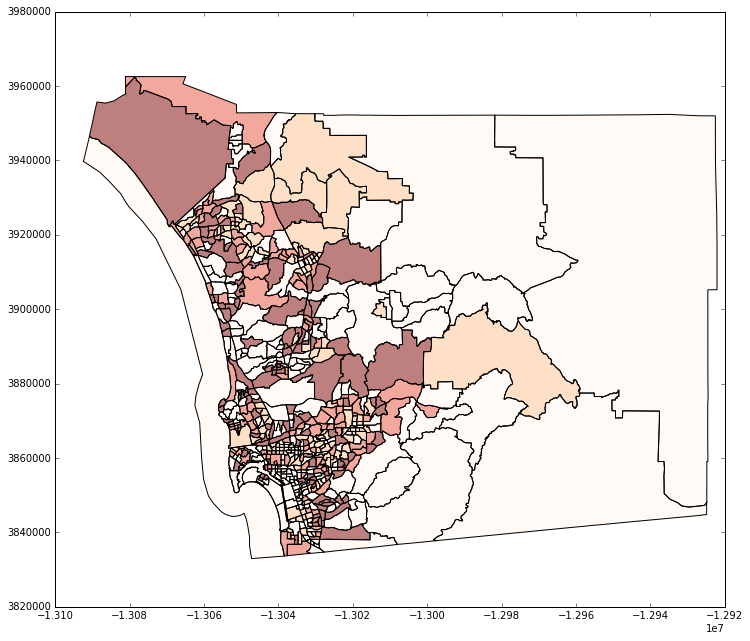

In [29]:
newdata.plot(column='B25064_001E', scheme='QUANTILES', k=5, colormap='OrRd')

In [30]:
newdata

,GEOID,GEOID_x,B01003_001E,B02001_002E,B02001_003E,B03003_003E,B01002_001E,B09001_001E,B09019_001E,B09019_002E,...,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,TRACT,geometry
343,06073000100,14000US06073000100,2716,2549,0,262,55.7,433,2716,2711,...,+32.7530051,-117.1858954,CT,G5020,Census Tract 1,32868,20755676340566,06,000100,"POLYGON ((-13046077.0368 3862535.43, -13046055..."
176,06073000201,14000US06073000201,2223,1983,27,383,47.1,253,2223,2223,...,+32.7540028,-117.1733775,CT,G5020,Census Tract 2.01,21905,207553717294854,06,000201,"POLYGON ((-13044291.8062 3863180.058499999, -1..."
167,06073000202,14000US06073000202,4683,4147,79,750,34.3,627,4683,4624,...,+32.7453947,-117.1751539,CT,G5020,Census Tract 2.02,21350,207553717294578,06,000202,"POLYGON ((-13044867.9959 3861599.656400003, -1..."
133,06073000300,14000US06073000300,4875,4013,148,671,40.8,246,4875,4682,...,+32.7447827,-117.1623035,CT,G5020,Census Tract 3,15150,20755676338501,06,000300,"POLYGON ((-13043153.8983 3862030.870700002, -1..."
134,06073000400,14000US06073000400,3606,2683,95,472,34.5,216,3606,3304,...,+32.7533382,-117.1630702,CT,G5020,Census Tract 4,15151,20755676338495,06,000400,"POLYGON ((-13043401.2502 3863312.430100001, -1..."
63,06073000500,14000US06073000500,2873,2338,122,428,36.5,257,2873,2867,...,+32.7606651,-117.1521746,CT,G5020,Census Tract 5,9781,20755676341496,06,000500,"POLYGON ((-13042359.4111 3863345.258400001, -1..."
64,06073000600,14000US06073000600,2904,2360,201,542,38.4,206,2904,2876,...,+32.7529930,-117.1519053,CT,G5020,Census Tract 6,9782,20755676341174,06,000600,"POLYGON ((-13042283.8252 3863262.525799997, -1..."
584,06073000700,14000US06073000700,4576,3970,65,704,36.6,187,4576,4576,...,+32.7447605,-117.1513507,CT,G5020,Census Tract 7,62459,20755676341881,06,000700,"POLYGON ((-13041814.3909 3860986.745099999, -1..."
571,06073000800,14000US06073000800,3927,3168,322,860,41.1,424,3927,3927,...,+32.7447819,-117.1420278,CT,G5020,Census Tract 8,62205,20755676340720,06,000800,"POLYGON ((-13040676.7057 3861694.950999998, -1..."
585,06073000900,14000US06073000900,5184,3791,626,1338,38.3,371,5184,5184,...,+32.7518529,-117.1419570,CT,G5020,Census Tract 9,62460,20755676340714,06,000900,"POLYGON ((-13040674.368 3862861.710900001, -13..."


In [69]:
geodata

,AREALAND,AREAWATER,BASENAME,CENTLAT,CENTLON,COUNTY,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,TRACT,geometry
0,1018274,0,43,+32.7353586,-117.1293851,073,S,06073004300,+32.7353586,-117.1293851,CT,G5020,Census Tract 43,1011,20755676340864,06,004300,"POLYGON ((-13039282.2064 3859531.026299998, -1..."
1,942246,0,44,+32.7243369,-117.1296570,073,S,06073004400,+32.7243369,-117.1296570,CT,G5020,Census Tract 44,1012,20755676340989,06,004400,"POLYGON ((-13039310.8156 3859325.255199999, -1..."
2,387073,0,46,+32.7151766,-117.1449004,073,S,06073004600,+32.7151766,-117.1449004,CT,G5020,Census Tract 46,1013,20755676341054,06,004600,"POLYGON ((-13040827.0983 3857637.140500002, -1..."
3,348489,0,47,+32.7083898,-117.1450800,073,S,06073004700,+32.7083898,-117.1450800,CT,G5020,Census Tract 47,1270,20755676338521,06,004700,"POLYGON ((-13040830.3266 3857077.091300003, -1..."
4,562968,0,48,+32.7084558,-117.1381400,073,S,06073004800,+32.7084558,-117.1381400,CT,G5020,Census Tract 48,1271,20755676338541,06,004800,"POLYGON ((-13040238.7748 3857082.251000002, -1..."
5,775746,0,49,+32.7018489,-117.1386692,073,S,06073004900,+32.7018489,-117.1386692,CT,G5020,Census Tract 49,1272,20755676341060,06,004900,"POLYGON ((-13040800.7156 3856243.8803, -130407..."
6,40509650,0,100.15,+32.5601358,-116.9531038,073,S,06073010015,+32.5601358,-116.9531038,CT,G5020,Census Tract 100.15,1574,207553717294634,06,010015,"POLYGON ((-13029090.6844 3836923.463299997, -1..."
7,15648511,253588,200.27,+33.1115850,-117.1938094,073,S,06073020027,+33.1171542,-117.1806234,CT,G5020,Census Tract 200.27,1575,207553717294635,06,020027,"POLYGON ((-13049623.7871 3910496.120899998, -1..."
8,39065449,0,208.10,+33.0348099,-116.7875799,073,S,06073020810,+33.0348099,-116.7875799,CT,G5020,Census Tract 208.10,1576,207553717294636,06,020810,"POLYGON ((-13009524.1688 3896636.946800001, -1..."
9,5961712,4662967,219,+32.6556197,-117.1147327,073,S,06073021900,+32.6564826,-117.1150589,CT,G5020,Census Tract 219,1577,207553717294641,06,021900,"POLYGON ((-13039455.5309 3852722.632299997, -1..."


In [70]:
geodata.columns

Index(['AREALAND', 'AREAWATER', 'BASENAME', 'CENTLAT', 'CENTLON', 'COUNTY',
       'FUNCSTAT', 'GEOID', 'INTPTLAT', 'INTPTLON', 'LSADC', 'MTFCC', 'NAME',
       'OBJECTID', 'OID', 'STATE', 'TRACT', 'geometry'],
      dtype='object')

In [71]:
geodata['GEOID']

0      06073004300
1      06073004400
2      06073004600
3      06073004700
4      06073004800
5      06073004900
6      06073010015
7      06073020027
8      06073020810
9      06073021900
10     06073020026
11     06073020028
12     06073013421
13     06073020811
14     06073021206
15     06073021500
16     06073017051
17     06073017109
18     06073017110
19     06073008513
20     06073008337
21     06073008600
22     06073014101
23     06073014102
24     06073008333
25     06073002100
26     06073016610
27     06073017306
28     06073008350
29     06073009509
          ...     
598    06073008360
599    06073007908
600    06073014806
601    06073017104
602    06073008502
603    06073017107
604    06073008504
605    06073008351
606    06073008352
607    06073008506
608    06073003301
609    06073008510
610    06073003303
611    06073003403
612    06073008512
613    06073017108
614    06073013908
615    06073013909
616    06073008303
617    06073006200
618    06073012200
619    06073

In [72]:
data['GEOID']

GEOID
06073000100    14000US06073000100
06073000201    14000US06073000201
06073000202    14000US06073000202
06073000300    14000US06073000300
06073000400    14000US06073000400
06073000500    14000US06073000500
06073000600    14000US06073000600
06073000700    14000US06073000700
06073000800    14000US06073000800
06073000900    14000US06073000900
06073001000    14000US06073001000
06073001100    14000US06073001100
06073001200    14000US06073001200
06073001300    14000US06073001300
06073001400    14000US06073001400
06073001500    14000US06073001500
06073001600    14000US06073001600
06073001700    14000US06073001700
06073001800    14000US06073001800
06073001900    14000US06073001900
06073002001    14000US06073002001
06073002002    14000US06073002002
06073002100    14000US06073002100
06073002201    14000US06073002201
06073002202    14000US06073002202
06073002301    14000US06073002301
06073002302    14000US06073002302
06073002401    14000US06073002401
06073002402    14000US06073002402
06073002

In [73]:
api_conn.variables.ix[cols].label

GEOID                                      Geographic Identifier
B01003_001E                                                Total
B02001_002E                                          White alone
B02001_003E                      Black or African American alone
B03003_003E                                   Hispanic or Latino
B01002_001E                                Median age --!!Total:
B09001_001E                                               Total:
B09019_001E                                               Total:
B09019_002E                                       In households:
B09019_005E    In households:!!In family households:!!Househo...
B09019_006E    In households:!!In family households:!!Househo...
B15003_017E                          Regular high school diploma
B15003_018E                        GED or alternative credential
B15003_002E                               No schooling completed
B08303_001E                                               Total:
B17001_002E    Income in 

In [74]:
newdata['B25064_001E']

343       NaN
176     966.0
167    1333.0
133    1327.0
134    1238.0
63     1161.0
64     1226.0
584    1323.0
571    1031.0
585    1028.0
302    1219.0
303    1164.0
136    1028.0
137    1145.0
138    1256.0
144    1127.0
576     951.0
577    1058.0
331     998.0
582    1369.0
173    2907.0
383    1724.0
25     1048.0
293     973.0
294     855.0
126     986.0
127     849.0
128    1051.0
518     979.0
519    1071.0
        ...  
51     1594.0
221    1722.0
243    2134.0
412    2189.0
193    1182.0
194    1026.0
229    1948.0
195    1107.0
8      2170.0
13     1969.0
217    1225.0
119     923.0
356     962.0
570     737.0
226     867.0
186     854.0
361       NaN
537    1359.0
14        NaN
109     960.0
230    3219.0
285    3150.0
531    1504.0
15     2145.0
190    2341.0
191    3021.0
9       883.0
521    1105.0
533    1954.0
451       NaN
Name: B25064_001E, dtype: float64

In [75]:
newdata['B25077_001E']

343    1038200.0
176     754900.0
167     589000.0
133     498900.0
134     433600.0
63      603000.0
64      421400.0
584     505500.0
571     389200.0
585     297800.0
302     392300.0
303     266200.0
136     290800.0
137     285600.0
138     596800.0
144     495300.0
576     265600.0
577     348700.0
331     297000.0
582     560600.0
173     752300.0
383     603000.0
25      469000.0
293     450000.0
294     230500.0
126     268800.0
127     180900.0
128     287500.0
518     301500.0
519     298400.0
         ...    
51      498600.0
221     444200.0
243     605800.0
412     502800.0
193     363000.0
194     300900.0
229     500000.0
195     365700.0
8       390400.0
13      380700.0
217     347800.0
119     183600.0
356     381500.0
570     161000.0
226     182400.0
186     328700.0
361     598000.0
537     364200.0
14      484300.0
109     414100.0
230     611800.0
285     563500.0
531     571400.0
15      974400.0
190    1224500.0
191    1691700.0
9       171700.0
521     246100

In [76]:
newdata.to_pickle('sd_df.pkl')